# Discount Factor, Interpolation and Forward Rates

If there are $Y$ payments each year the discount factor formula becomes

\begin{equation}
D_n = \cfrac{1}{(1+r)^{n}}
\end{equation}

When the continuously-compounded hypothesis is used the discount factor becomes

\begin{equation}
D_n = e^{-rn}
\end{equation}

Discount factors are usually presented as curves (*discount curves*) where each point represents a discount factor relative to a future date.

![alt text](discount_curve.png "Title")

Since usually discount factors are available only at discrete times some technique is needed to determine the factors at any time would be needed, this tool is called *interpolation*.

# Interpolation

## Linear interpolation

It may happen to have few data points, obtained by sampling or experimenting. 
These points represent the values of a function $f(x)$, where $x$ is a variable (e.g. in recording a trip: distances at certain times, $d = f(t)$). 
It is often required to estimate the value of that function for intermediate values of the variable $x$ (e.g. what is the distance $d$ at a new time $t$ not sampled originally ?).

Interpolation is a method to "construct" new points within a range of a discrete set of known data points. 

#### Example 1
Assume you are going on holidays by car and that luckily there isn't much traffic so that you can drive at constant speed (which gives a linear relation between travelled space and time i.e. $s = v \cdot t$, which means that if you plot the distances $s$ as a function of the time $t$ you get a line with slope $v$).

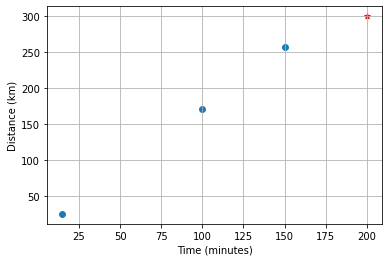

In [1]:
from matplotlib import pyplot as plt

t = [15, 100, 150]
s = [25.75, 171.7, 257.7]

t_ex = [200]
s_ex = [300]

plt.scatter(t, s, marker="o", s=35)
plt.scatter(t_ex, s_ex, marker="*", s=35, color="red")
plt.xlabel("Time (minutes)")
plt.ylabel("Distance (km)")
plt.grid(True)
plt.show()

Given two samples of the car travelled distance $s_1$ and $s_2$ taken at two different times $t_1$ and $t_2$ you can linearly interpolate to find your position at different times using the following relations:

$$s(t) = (1 - w)\cdot s_1 + w \cdot s_2~~~~~~~~~(\textrm{with}~w = \frac{t - t_1}{t_2 - t_1})$$
($t$ generic time at which we want to know the distance $s$)

**The simple derivation of this relation is available in the lecture notes.**

This formula can also be understood as a weighted average, where the weights are inversely related to the distance from the end points to the unknown point; the closer point has more influence than the farther point. 

\begin{equation*}
w_1 = (1 - w) = \cfrac{t_2 - t}{t_2 - t_1} \\
w_2 = w = \frac{t - t_1}{t_2 - t_1}
\end{equation*}
which are distances between the unknown point and each of the end points.

Back to our example, if $s_1 = 25.75~\mathrm{km}\;(@t_1 = 15~\mathrm{min})$ and $s_2 = 171.7~\mathrm{km}\;(@t_2 = 100~\mathrm{min})$ let's compute:

In [3]:
# interpolate at t = 60

s1 = 25.75
s2 = 171.7
t1 = 15
t2 = 100

t = 60
w = (t-t1)/(t2-t1)

s = (1-w) * s1 + w * s2
print (s)

103.01764705882351


![alt text](interp_example1.png "Title")

If we believe the relation between our variable stays the same, we can use the same formula to extrapolate values outside our initial sample.

For example if we keep the same constant velocity in our trip we could check:

In [4]:
# distance travelled in 180 min trip (extrapolation)

t = 180
w = (t-t1)/(t2-t1)

s = (1-w) * s1 + w * s2
print (s)

309.0647058823529


### Log-linear interpolation

When the function $f$ that we want to interpolate is an exponential we can fall back to the previous case by a simple variable transformation. 

$$p = \mathrm{exp}(c \cdot h)$$

$$s = \mathrm{log}(p) = \mathrm{log}(\mathrm{exp}(c \cdot h)) = c \cdot h$$

$$w = \frac{h - h_1}{h_2 - h_1}$$

$$s = (1 - w)\cdot s_1 + w \cdot s_2\;\;(\mathrm{remember \;now }\;s = \mathrm{log}(p))$$

$$p = \mathrm{exp}(s)$$

#### Example 2

Atmospheric pressure decreases with the altitude (i.e. the highest I flight the lower is the pressure) following an exponential law:

$$p = p_0\cdot e^{-\alpha h}$$

where

* $h$ is the altitude
* $p_0$ is the pressure at sea level
* $\alpha$ is a constant

Taking the logarithm of each side of the equation I get a linear relation which can be interpolated as before:

$$s = \mathrm{log}(p) = \mathrm{log}(p_0\cdot e^{-\alpha h}) = - \alpha \cdot h$$

Now assume that we have measured $p_1 = 90~\mathrm{kPa}\;(h_1 = 1000~\mathrm{m})$ and $p_2 = 40~\mathrm{kPa}\;(h_2 = 7000~\mathrm{m})$ what will be the atmospheric pressure on top of the Mont Blanc ($4812~\mathrm{m}$) ? and on top of Mount Everest ($8848~\mathrm{m}$) ? 

In [5]:
# pressure on top of the Mont Blanc (interpolation)
from math import log, exp

p1 = 90
p2 = 40
h1 = 1000
h2 = 7000
s1 = log(p1)
s2 = log(p2)

h = 4812
w = (h-h1)/(h2-h1)
s = (1-w)*s1 + w*s2
print (s)
print (exp(s))

3.984598672960824
53.76370831775357


In [6]:
# pressure on top of the Mount Everest (extrapolation)
h = 8848

w = (h-h1)/(h2-h1)
s = (1-w)*s1 + w*s2
print (s)
print (exp(s))

3.4391129475193067
31.159305965991525


<img src="Atmospheric_Pressure_vs._Altitude.png" width=500>

### Limitations of Linear Interpolation

Interpolation is just an approximation and works well when either the function $f$ is linear or we are trying to interpolate between two points that are close enough to believe that $f$ is *almost* linear in that interval.
It can be easily demonstrated that the approximation between two points on a given function gets worse with the second derivative of the function that is approximated. This is intuitively correct: the "curvier" the function is, the worse the approximations made with simple linear interpolation become.

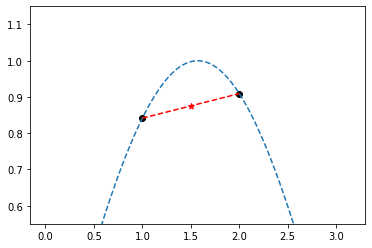

In [7]:
import numpy as np
from matplotlib import pyplot as plt

x = [1, 2]
y = np.sin(x)

xi = 1.5
z = np.interp(xi, x, y)
xs = np.arange(0,np.pi, 0.01)
plt.plot(xs, np.sin(xs), linestyle="--")
plt.plot([1,1.5,2], [y[0], z, y[1]], linestyle="--", color="red")
plt.scatter(x, y, marker="o", color="black")
plt.scatter(xi, z, marker="*", color="red")
plt.ylim(0.55, 1.15)
plt.show()

## Discount curve interpolation

Finally we can come back to finance and using what we have just learnt try to write a function which interpolates some given discount factors.

Needed data:

* a list of pillars dates specifying the value dates of the given discount factors, $t_0,...,t_{n-1}$
* a list of given discount factors, $D(t_0),...,D(t_{n-1})$
* a pricing date ('today' date) which corresponds to $t=0$

The input argument to the function will be the value date at which we want to interpolate the discount factor.

Since the discount factor can be expresses as $D=e^{-r(T-t)}$ the function will use a log-linear interpolation to return the value we are looking for.
More technically we can say that we are doing a linear interpolation over time in the log space.

So applying the same steps as before we get:

$$d(t_i):=\mathrm{ln}(D(t_i))$$

$$d(t) = (1-w)d(t_i) + wd(t_{i+1});\;\;\;w=\frac{t-t_i}{t_{i+1}-t_i}$$

$$D(t) = \mathrm{exp}(d(t))$$

where $i$ is such that $t_i \le t \le t_{i+1}$

Instead of reinventing the wheel and perform the interpolation with our own code, we'll use the function `interp` provided by the module `numpy`. So first let's try it with some simple examples:

In [ ]:
# the numpy.interp function linearly interpolates
from numpy import interp

xf = [1, 2, 5, 6]
yf = [2, 4, 7, 10]

In [ ]:
# define the df function


This is almost OK, **but it won't work** because ```numpy.interp``` only accepts numbers/lists of numbers as arguments i.e. it doesn't automatically convert or interpret dates as numbers in any way, so it doesn't know how to interpolate them.
So we need to do the conversion ourselves before passing the data into the ```numpy.interp``` function.

In [ ]:
# corrected function


In [ ]:
# now we can use the df function to get discount factors
# on value dates between the given pillar dates
observation_date = date.today()
pillar_dates = [date.today(), date(2021, 4, 15), date(2021, 10, 15)]
discount_factors = [1, 0.95, 0.72]

df_date = date(2020, 12, 25)

In [ ]:
# let's see what these look like when plotted on a semi‐log graph
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

plt.semilogy(pillar_dates, discount_factors, marker='o')
plt.semilogy(df_date, df0 , marker='X')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()

In [ ]:
# let's see what these look like when plotted on a linear graph

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
plt.plot(pillar_dates, discount_factors, marker='o')
plt.plot(df_date,df0 , marker='X')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()

**In the lecture notes you will see an implementation of a DiscountCurve class which is capable of computing discount factors at arbitrary dates. As an exercise try to implement it yourself and add the code to your own finmarkets.py module.**

# Forward Rates

## Calculating Forward Rates

We have just written s function called `df` for calculating a discount factor at any date, given a set of discount factors each relative to a corresponding pillar date, using log-linear interpolation. Now we want a function to compute forward rates.

The formula to calculate the forward rates can be found exploiting the property that investing at rate $r_1$ for the period $(0, T_1)$ and then *reinvesting* at rate $r_{1,2}$ for the time period $(T_1, T_2)$ is equivalent to invest at rate $r_2$ for the time period $(0, T_2)$ (i.e. no arbitrage condition, two investors shouldn't be able to earn money from arbitraging between different interest periods). That said:

$$(1+r_1 T_1)(1+r_{1,2}(T_2 - T_1)) = 1 + r_2 T_2$$

Solving for $r_{1,2}$ leads to

$$F(T_1, T_2) = r_{1,2} = \frac{1}{T_2-T_1}\Big(\frac{D(T_1)}{D(T_2)} - 1 \Big)~~~~\textrm{(where $D{(T_i)}=\frac{1}{1+r_iT_{i}}$)}$$

In [ ]:
import numpy
from math import log


In [ ]:
from datetime import date
observation_date = date (2020, 1, 1)

pillar_dates = [date(2020, 1, 1), 
                date(2021, 1, 1), 
                date(2022, 8, 1)]
rates = [0.05, 0.07, 0.08]


### 2008 Financial Crisis

Looking at the historical series of the Euribor (6M) rate versus the Eonia Overnight Indexed Swap (OIS-6M) rate over  the time interval 2006-2011 it becomes apparent how before August 2007 the two rates display strictly overlapping trends differing of no more than 6 bps. 

<img src="credit_crunch.png" width=600>

In August 2007 however we observe a sudden increase of the Euribor rate and a simultaneous decrease of the OIS rate  that leads to the explosion of the corresponding basis spread, touching the peak of 222 bps in October 2008, when Lehman Brothers filed for bankruptcy protection. Successively the basis has sensibly reduced and stabilized between  40 bps and 60 bps (notice that the pre-crisis level has never been recovered). The same effect is observed for other similar couples, e.g. Euribor 3M vs OIS 3M. 

The reason of the abrupt divergence between the Euribor and OIS rates can be explained by considering both the monetary policy decisions adopted by international authorities in response to the financial turmoil, and the impact of the credit crunch on the credit and liquidity risk perception of the market, coupled with the different financial meaning and dynamics of these rates. 

As a practial result, after the 2008 financial crisis, it is not possible anymore to use a single discount curve to correctly price forward rates of all tenors. For example, if we want to calculate the net present value of a forward 6-month libor coupon, we need to simultaneously use two different discount curves:

* the 6-month libor curve for determining the forward rate
* the EONIA curve for discounting the expected cash flow

Essentially we will hav to implement the following calculation:

$$\mathrm{NPV} = D_{\mathrm{EONIA}}(T_1) \times \frac{1}{T_2-T_1}\Big(\frac{D_{\mathrm{LIBOR}}(T_1)}{D_{\mathrm{LIBOR}}(T_2)} - 1 \Big)$$

In [ ]:
from finmarkets import DiscountCurve
from math import exp
